## Breast Cancer Classification with Neural Networks

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [3]:
# Loading the dataset
breast_cancer = sklearn.datasets.load_breast_cancer()

In [6]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
# Creating the dataframe
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [9]:
# Print the first 5 rows of the dataframe
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Adding the target column to the dataframe
breast_cancer_df['class'] = breast_cancer.target

In [11]:
# Print the first 5 rows of the dataframe
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
# Check the number of rows and columns in the dataframe
breast_cancer_df.shape

(569, 31)

In [13]:
# Check the distribution of the target variable
breast_cancer_df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [16]:
# Check some information about the dataset
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
# Checking the statistical measures of the dataset
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [19]:
# Visualizing the distribution of the target variable
breast_cancer_df.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [20]:
# Splitting the features and target
X = breast_cancer_df.drop('class', axis = 1)
Y = breast_cancer_df['class']

In [23]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [24]:
# Checking the shape of the training and testing sets
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [29]:
# Standardizing the data

# Importing the StandardScaler
from sklearn.preprocessing import StandardScaler

In [30]:
# Creating the StandardScaler object
scaler = StandardScaler()

# Standardizing both the training and testing sets
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

**Building the neural network model**

In [31]:
# Importing the necessary libraries
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [32]:
# Setting the layers of the neural network

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (30, )),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [33]:
# Compiling the neural network
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [34]:
# Training the neural network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=15)

Epoch 1/15
13/13 [==============================] - 4s 59ms/step - loss: 0.9122 - accuracy: 0.4377 - val_loss: 0.7563 - val_accuracy: 0.5652
Epoch 2/15
13/13 [==============================] - 0s 11ms/step - loss: 0.5811 - accuracy: 0.7139 - val_loss: 0.4774 - val_accuracy: 0.8696
Epoch 3/15
13/13 [==============================] - 0s 12ms/step - loss: 0.4072 - accuracy: 0.8337 - val_loss: 0.3369 - val_accuracy: 0.9130
Epoch 4/15
13/13 [==============================] - 0s 12ms/step - loss: 0.3219 - accuracy: 0.8729 - val_loss: 0.2616 - val_accuracy: 0.9348
Epoch 5/15
13/13 [==============================] - 0s 11ms/step - loss: 0.2689 - accuracy: 0.8973 - val_loss: 0.2139 - val_accuracy: 0.9783
Epoch 6/15
13/13 [==============================] - 0s 11ms/step - loss: 0.2345 - accuracy: 0.9193 - val_loss: 0.1802 - val_accuracy: 0.9783
Epoch 7/15
13/13 [==============================] - 0s 9ms/step - loss: 0.2088 - accuracy: 0.9291 - val_loss: 0.1555 - val_accuracy: 0.9783
Epoch 8/15
13/

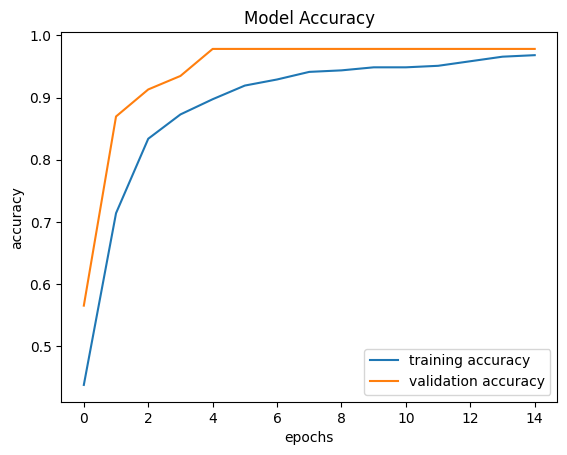

In [36]:
# Visualizing the accuracy
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')

plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

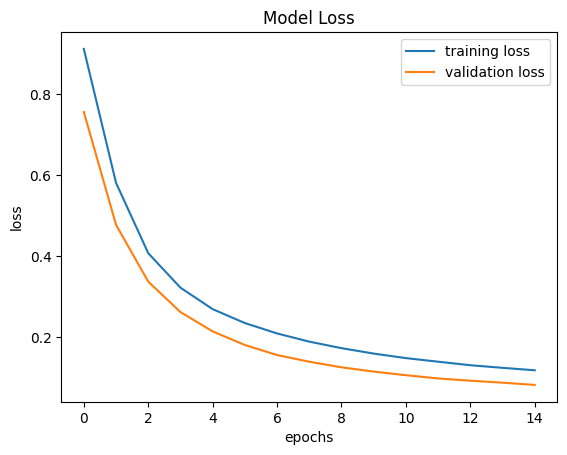

In [37]:
# Visualizing the loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')

plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [42]:
# Evaluating the model on the test data
loss, accuracy = model.evaluate(X_test_std, Y_test)
print('Test accuracy: ', accuracy, '\nTest loss: ', loss)

4/4 [==============================] - 0s 4ms/step - loss: 0.1064 - accuracy: 0.9649
Test accuracy:  0.9649122953414917 
Test loss:  0.10643254965543747


In [43]:
# Making predictions on the test data
Y_pred = model.predict(X_test_std)
Y_pred[:5]

4/4 [==============================] - 1s 3ms/step


array([[0.95413995, 0.44270423],
       [0.0966855 , 0.89475584],
       [0.10497118, 0.9132585 ],
       [0.12431066, 0.86358976],
       [0.24046665, 0.67826915]], dtype=float32)

In [44]:
# Converting the predictions to classes
Y_pred_classes = []

for element in Y_pred:
    if element[0] > element[1]:
        Y_pred_classes.append(0)
    else:
        Y_pred_classes.append(1)

In [45]:
Y_pred_classes[:5]

[0, 1, 1, 1, 1]

In [46]:
# Importing the confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

# Creating the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_classes)
print(cm)

[[40  2]
 [ 2 70]]


In [47]:
# Creating the classification report
print(classification_report(Y_test, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [48]:
# Importing the necessary libraries
from sklearn.metrics import roc_auc_score, roc_curve

In [49]:
# Calculating the roc_auc_score
r_a_score = roc_auc_score(Y_test, Y_pred_classes)
print('ROC-AUC-Score: ', r_a_score)

ROC-AUC-Score:  0.9623015873015873


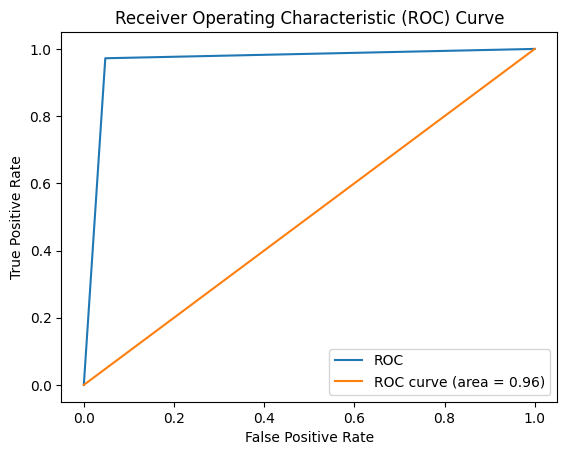

In [50]:
# Calculating the roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_classes)

# Plotting the roc_curve
plt.plot(fpr, tpr, label = 'ROC')
plt.plot([0, 1], [0, 1], label = 'ROC curve (area = %0.2f)' % r_a_score)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()


In [51]:
# Building a predictive system
input_data = (13.08, 15.71, 85.63, 520, 0.1075, 0.127, 0.04568, 0.0311, 0.1967, 0.06811, 0.1852, 0.7477, 1.383, 14.67, 0.004097, 0.01898, 0.01698, 0.00649, 0.01678, 0.002425, 14.5, 20.49, 96.09, 630.5, 0.1312, 0.2776, 0.189, 0.07283, 0.3184, 0.08183)

# Converting the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardizing the input data
std_data = scaler.transform(input_data_reshaped)

# Making prediction on the input data
prediction = model.predict(std_data)
print(prediction)

if prediction[0][0] > prediction[0][1]:
    print('The breast cancer is Malignant')
else:
    print('The breast cancer is Benign')

# Saving the model
model.save('breast_cancer_classification_model.h5')

c:\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 223ms/step
[[0.18490428 0.8698384 ]]
The breast cancer is Benign


c:\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
